In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans

In [2]:
record = pd.read_csv( 'data-33' , sep='\t', header=None)

In [3]:
record.columns = ['date','time','code','value']

In [4]:
record.head()

,date,time,code,value
0,07-31-1990,18:28,34,1
1,07-31-1990,22:49,63,320
2,07-31-1990,22:51,71,0
3,07-31-1990,22:51,33,3
4,07-31-1990,22:51,34,7


In [5]:
record.describe()


,code,value
count,300.000000,300.000000
mean,51.423333,64.213333
std,15.201351,85.600307
min,33.000000,0.000000
25%,33.000000,2.000000
50%,58.000000,7.000000
75%,64.000000,111.750000
max,72.000000,349.000000


In [6]:
#prebreakfast 58, post supper 63, for both pre breakfast and post supper reading
pre_breakfast = record[((record['code'] == 58) | (record['code'] == 63))]

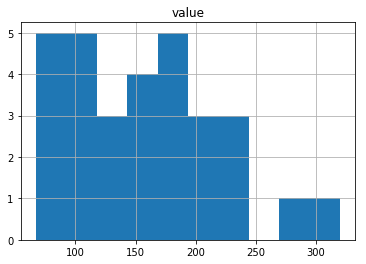

In [7]:
pre_breakfast.hist(column='value')
plt.show()

In [8]:
X = pre_breakfast[['code' , 'value']]

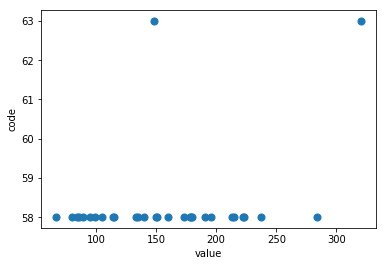

In [9]:
X.plot.scatter(x='value' , y='code' ,s=50 )

/Users/Amin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


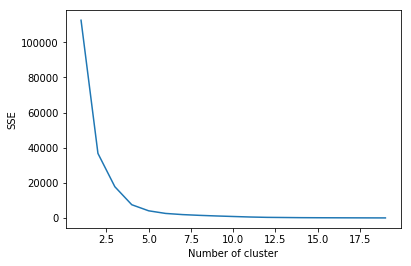

In [10]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3)
res = kmeans.fit(X)

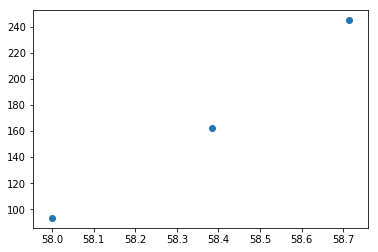

In [18]:
plt.scatter(x=res.cluster_centers_[:,0], y=res.cluster_centers_[:,1])